In [ ]:
# check if this instance of the notebook already has files present
# and thus determine which steps required prior to reading in file and handling the data
!ls

drive  sample_data


In [ ]:
# set-up spark (NB if Apache amend versions on download site we will need to amend path in wget command)
## NOTE that this version would make use of Hadoop if installed BUT that HDFS & Hadoop is not installed on our Colab
## (we are only using a single node (probably as a VM) so we will not be able to benefit from parallelism)
!clear
!echo welcome

!rm -f spark-3.3.[01]-bin-hadoop3.tgz* 
!rm -rf spark-3.3.[01]-bin-hadoop3

!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
!tar -xf spark-3.3.2-bin-hadoop3.tgz

!ls -alt
print("standalone Spark is now installed")

welcome
--2023-05-24 21:16:51--  https://downloads.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f8:10a:201a::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz’

spark-3.3.2-bin-had 100%[===================>] 285.49M  12.9MB/s    in 24s     

2023-05-24 21:17:16 (11.8 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz’ saved [299360284/299360284]

total 292376
drwxr-xr-x  1 root root      4096 May 24 21:17 .
drwx------  5 root root      4096 May 24 21:16 drive
drwxr-xr-x  1 root root      4096 May 24 21:13 ..
drwxr-xr-x  1 root root      4096 May 23 13:31 sample_data
drwxr-xr-x  4 root root      4096 May 23 13:30 .config
-rw-r--r--  1 root root 299360284 Feb 10 21:28 spark-3.3.2-bin-hadoop3.tgz
drwxr-xr-x 13  501 100

In [ ]:
# init spark (ensure SPARK_HOME set to same version as we download earlier)
!pip3 install findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop3"
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
# the next line gives us 'local' mode. try 'local[2]' to use 2 cores or 'master:NNNN' to run on Spark standalone cluster at port NNNN
spark_conf = SparkConf().setMaster('local[2]').setAppName('MyApp')
sc = SparkContext(conf=spark_conf)
# see what we have by examining the Spark User Interface
from pyspark.sql import *
from pyspark.sql.functions import *
SparkSession.builder.getOrCreate()
## 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#I got the file from www.ons.gov.uk
!wget https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/adhocs/004930numberofdeathswheretheunderlyingcausewasasthmabymonthofoccurrenceenglandandwalesdeathsthatoccurredbetween2001and2014/asthmadeathsbymonthew200114_tcm77-425256.xls


The name is too long, 267 chars total.
Trying to shorten...
New name is file?uri=%2Fpeoplepopulationandcommunity%2Fhealthandsocialcare%2Fconditionsanddiseases%2Fadhocs%2F004930numberofdeathswheretheunderlyingcausewasasthmabymonthofoccurrenceenglandandwalesdeathsthatoccurredbetween2001and2014%2Fasthmadeathsb.
--2023-05-24 21:17:31--  https://www.ons.gov.uk/file?uri=/peoplepopulationandcommunity/healthandsocialcare/conditionsanddiseases/adhocs/004930numberofdeathswheretheunderlyingcausewasasthmabymonthofoccurrenceenglandandwalesdeathsthatoccurredbetween2001and2014/asthmadeathsbymonthew200114_tcm77-425256.xls
Resolving www.ons.gov.uk (www.ons.gov.uk)... 104.16.230.22, 104.16.231.22, 2606:4700::6810:e616, ...
Connecting to www.ons.gov.uk (www.ons.gov.uk)|104.16.230.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/vnd.ms-excel]
Saving to: ‘file?uri=%2Fpeoplepopulationandcommunity%2Fhealthandsocialcare%2Fconditionsanddiseases%2Fadhocs%2F00

In [ ]:
from pyspark.sql import SparkSession

# Create a new SparkSession or retrieve an existing one
spark = SparkSession.builder.appName("MyApp").getOrCreate()

In [ ]:
!ls

 drive
'file?uri=%2Fpeoplepopulationandcommunity%2Fhealthandsocialcare%2Fconditionsanddiseases%2Fadhocs%2F004930numberofdeathswheretheunderlyingcausewasasthmabymonthofoccurrenceenglandandwalesdeathsthatoccurredbetween2001and2014%2Fasthmadeathsb'
 sample_data
 spark-3.3.2-bin-hadoop3
 spark-3.3.2-bin-hadoop3.tgz


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving asthmadeathsbymonthew200114_tcm77-425256.xls to asthmadeathsbymonthew200114_tcm77-425256.xls


In [ ]:
# Reading of the file
asthma_df = (spark.read.format("csv")
         .option("header", "true")
         .option("inferSchema", "true")
         .load("/content/drive/MyDrive/asthmadeathsbymonthew200114_tcm77-425256.csv"))

In [ ]:
asthma_df.show()

+---------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----------------+
|Number of deaths where the underlying cause was asthma by month of occurrence,  England and Wales, deaths that occurred between 2001 and 2014 1,2,3| _c1| _c2| _c3| _c4| _c5| _c6| _c7| _c8| _c9|_c10|_c11|_c12|_c13|            _c14|
+---------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----------------+
|                                                                                                                                               null|null|null|null|null|null|null|null|null|null|null|null|null|null|            null|
|                                                                       

In [ ]:
print("Number of rows in asthma_df: ", asthma_df.count())

Number of rows in asthma_df:  24


In [ ]:
#from pyspark.sql.functions import col, isnan, when, trim

# Remove null values
#df = df.na.drop()

# Rename each columns
#new_column_names = ["Month", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
#for old, new in zip(df.columns, new_column_names):
   # df = df.withColumnRenamed(old, new)

# Show the cleaned DataFrame
#df.show()

In [ ]:
from pyspark.sql.functions import col

# Remove null values
asthma_df = asthma_df.dropna()

# Rename each column
new_column_names = ["Month", "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010", "2011", "2012", "2013", "2014"]
asthma_df = asthma_df.toDF(*new_column_names)

# Show the cleaned DataFrame
asthma_df.show()


+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|              Month|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|
+-------------------+----+----+----+----+----+----+----+----+----+----+----+----+----+----+
|Month of occurrence|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|
|                Jan| 136| 144| 130| 155| 146| 113| 124| 115| 149| 136| 153| 122| 141| 108|
|                Feb| 119| 106| 107| 123| 125|  95| 116| 103|  97|  98|  84| 122| 124|  87|
|                Mar| 119| 128|  92| 109| 139| 116|  86|  85|  76| 100| 103| 122| 124|  98|
|                Apr| 111| 100| 115|  95| 112| 108|  91|  88|  75|  61|  79| 111| 107| 101|
|                May| 106| 107| 100|  98|  88|  78|  69|  80|  64|  70|  77|  87|  87|  74|
|                Jun|  81|  94|  75|  84|  97|  78|  84|  77|  80|  81|  63|  73|  80|  65|
|                Jul|  88|  83|  80|  91|  67|  87|  81|  62|  67|  53|  61|  69

In [ ]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

# Create a window specification to partition by all columns
window_spec = Window.partitionBy(*asthma_df.columns)

# Add a count column to identify duplicates
autumn_df_with_count = asthma_df.withColumn("count", F.count("*").over(window_spec))

# Filter rows with count greater than 1
duplicate_rows = autumn_df_with_count.where(F.col("count") > 1)

# Show the duplicate rows
duplicate_rows.show()


+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+
|Month|2001|2002|2003|2004|2005|2006|2007|2008|2009|2010|2011|2012|2013|2014|count|
+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+
+-----+----+----+----+----+----+----+----+----+----+----+----+----+----+----+-----+



In [ ]:
# Select "Month" and "2014" columns
asthma_df_2014 = asthma_df.select("Month", "2014")

# Show DataFrame
asthma_df_2014.show()

+-------------------+----+
|              Month|2014|
+-------------------+----+
|Month of occurrence|2014|
|                Jan| 108|
|                Feb|  87|
|                Mar|  98|
|                Apr| 101|
|                May|  74|
|                Jun|  65|
|                Jul|  77|
|                Aug|  75|
|                Sep|  73|
|                Oct|  93|
|                Nov| 105|
|                Dec| 105|
+-------------------+----+



In [ ]:
asthma_df_2014.printSchema()

root
 |-- Month: string (nullable = true)
 |-- 2014: string (nullable = true)



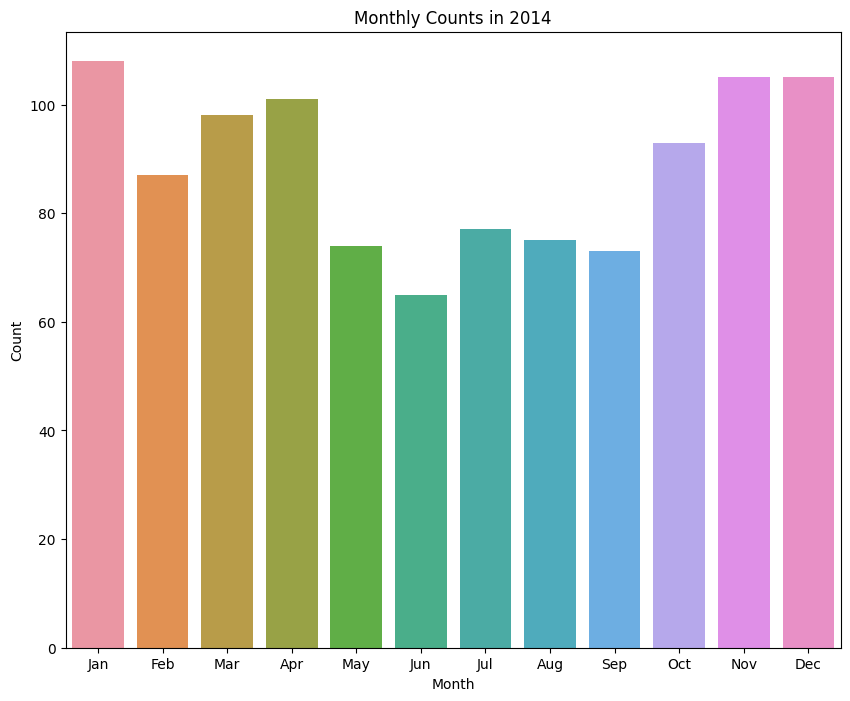

In [ ]:
from pyspark.sql.functions import col

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter out the unnecessary row
asthma_df_2014 = asthma_df_2014.filter(col('Month') != 'Month of occurrence')
asthma_df_2014 = asthma_df_2014.filter(col('2014') != '2014')

# Convert column '2014' from string to integer
asthma_df_2014 = asthma_df_2014.withColumn("2014", col("2014").cast("integer"))

# Convert the Spark DataFrame to a Pandas DataFrame for plotting
pandas_df = asthma_df_2014.toPandas()

# Plotting
plt.figure(figsize=(10,8))
sns.barplot(x='Month', y='2014', data=pandas_df)
plt.title('Monthly Counts in 2014')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()



In [ ]:
from pyspark.sql.functions import max, min, sum

# Calculate total deaths
total_deaths = asthma_df_2014.select(sum("2014")).collect()[0][0]

# Find the month with most deaths
max_deaths_row = asthma_df_2014.orderBy(asthma_df_2014['2014'].desc()).first()
max_month = max_deaths_row['Month']
max_deaths = max_deaths_row['2014']

# Find the month with least deaths
min_deaths_row = asthma_df_2014.orderBy(asthma_df_2014['2014']).first()
min_month = min_deaths_row['Month']
min_deaths = min_deaths_row['2014']

# Calculate percentages
max_percentage = (max_deaths / total_deaths) * 100
min_percentage = (min_deaths / total_deaths) * 100

print(f'Month with most deaths: {max_month} with {max_deaths} deaths ({max_percentage:.2f}%)')
print(f'Month with least deaths: {min_month} with {min_deaths} deaths ({min_percentage:.2f}%)')


Month with most deaths: Jan with 108 deaths (10.18%)
Month with least deaths: Jun with 65 deaths (6.13%)


In [ ]:
# proving the Hypothesis that more people died from Asthma in the Autumn than in the spring
# First, let's convert our Spark DataFrame to a pandas DataFrame for easier processing
asthma_df_2014_pd = asthma_df_2014.toPandas()

# Now, we need to remove the first row as it doesn't contain actual data
asthma_df_2014_pd = asthma_df_2014_pd.iloc[1:]

# Convert the 2014 column to numeric
asthma_df_2014_pd['2014'] = pd.to_numeric(asthma_df_2014_pd['2014'])

# Define the months corresponding to Spring and Autumn
spring_months = ['Mar', 'Apr', 'May', 'Jun']
autumn_months = ['Sep', 'Oct', 'Nov']

# Calculate the sum of deaths in Spring and Autumn
spring_deaths = asthma_df_2014_pd[asthma_df_2014_pd['Month'].isin(spring_months)]['2014'].sum()
autumn_deaths = asthma_df_2014_pd[asthma_df_2014_pd['Month'].isin(autumn_months)]['2014'].sum()

print(f"Deaths in Spring: {spring_deaths}")
print(f"Deaths in Autumn: {autumn_deaths}")

if autumn_deaths > spring_deaths:
    print("The hypothesis is true. More people died of Asthma in Autumn than in Spring in 2014.")
else:
    print("The hypothesis is false. More people died of Asthma in Spring than in Autumn in 2014.")


Deaths in Spring: 338
Deaths in Autumn: 271
The hypothesis is false. More people died of Asthma in Spring than in Autumn in 2014.


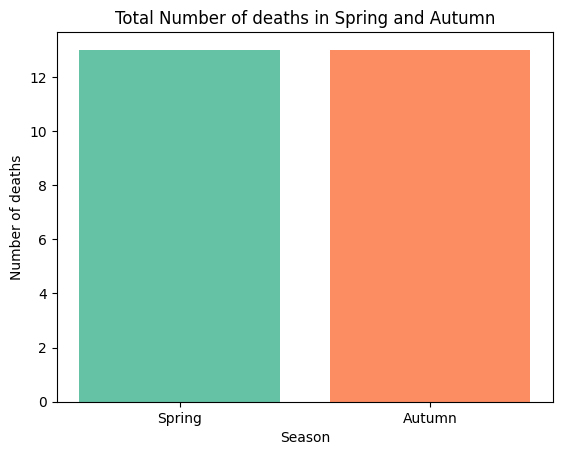

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total number of deaths in Spring and Autumn
spring_count = asthma_df.count()
autumn_count = asthma_df.count()

# Define the colors for the bars
colors = sns.color_palette("Set2")

# Plot the total number of bike rides in each season with colors
plt.bar(['Spring','Autumn'], [spring_count, autumn_count], color=colors)
plt.xlabel("Season")
plt.ylabel("Number of deaths")
plt.title("Total Number of deaths in Spring and Autumn")
plt.show()